# creating own array
1. initialize array
2. fill array
3. vizualize array 2-dimensional

In [9]:
# array bauen
import numpy as np

y=np.array([0, 1, 2, 3])
print(y)

#entsprechend den ersten 4 embeddings des unten eingelesenen textes: 'human', 'in', 'interface', 'is' 
X_2d = np.array([[-44.354923, -95.2978], 
                 [-174.67386, 87.660484], 
                 [178.83932, -4.4730515], 
                 [100.901505, -150.73198]])

print(X_2d)

[0 1 2 3]
[[ -44.354923   -95.2978   ]
 [-174.67386     87.660484 ]
 [ 178.83932     -4.4730515]
 [ 100.901505  -150.73198  ]]


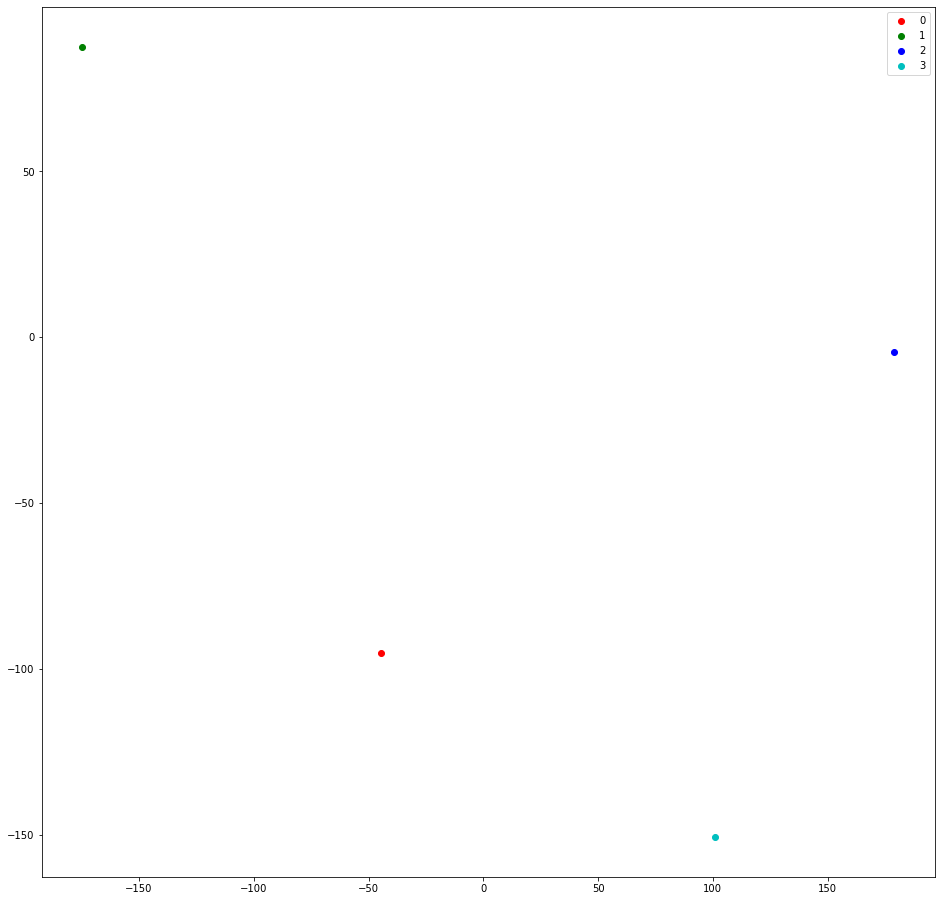

In [10]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn import datasets
digits = datasets.load_digits()

#2-dimensionales tsne model erstellen
tsne = TSNE(n_components=2, random_state=0)

#als scatterplot darstellen
target_ids = range(len(digits.target_names))
plt.figure(figsize=(16, 16))
colors = 'r', 'g', 'b', 'c'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

---
## create your own embeddings and vizualize it in s-dim

1. initialize model with own tiny dataset
2. vizualize model as scatterplott

In [11]:
from gensim.models import Word2Vec

# dataset
tokenized_sentences = [['human', 'in', 'interface', 'is', 'kind', 'of', 'a', 'computer', 'survey'],['the', 'user', 'as', 'system', 'in' 'response', 'on', 'time', 'and', 'trees', 'and', 'graph', 'as', 'minors']]

# model initialize / train
model = Word2Vec(tokenized_sentences, size=100, window=2, min_count=0)

# print a summary of the model
print(model)

Word2Vec(vocab=20, size=100, alpha=0.025)


In [12]:
# create list from vocab list 
words = model.wv.vocab.keys()
print(words)

dict_keys(['human', 'in', 'interface', 'is', 'kind', 'of', 'a', 'computer', 'survey', 'the', 'user', 'as', 'system', 'inresponse', 'on', 'time', 'and', 'trees', 'graph', 'minors'])


In [14]:
# print numpy vektor (100) from word 'as' 
model.wv['as']

array([-3.1900543e-04,  1.2562113e-03, -2.0901409e-03,  4.3363203e-03,
        4.1070143e-03,  1.2428002e-03, -1.8010481e-04,  2.1216671e-03,
       -2.9306887e-03, -3.9821491e-03,  1.2331763e-04,  3.8617451e-04,
       -4.0376619e-03, -3.0536528e-03,  3.1935375e-03, -2.5500918e-03,
       -1.5302548e-03,  3.5569877e-03, -4.3863934e-03, -6.1552675e-04,
       -4.8833778e-03,  4.0964215e-04, -2.5319525e-03, -2.4982734e-04,
       -2.6192784e-03, -1.7707525e-03,  2.2555673e-03, -5.5219035e-04,
       -1.4943189e-03, -5.9017306e-04, -4.8589017e-03, -1.2593344e-03,
        1.4245745e-03, -6.0061080e-04,  4.6116817e-03, -4.7420370e-03,
       -2.6847862e-03,  1.7237175e-03, -3.2991776e-03, -3.7029409e-03,
        3.5739038e-04, -1.4946770e-03, -4.1785040e-03,  4.1378308e-03,
        3.1597833e-03,  3.4412243e-03, -4.3241726e-03,  7.4165035e-04,
        3.6678254e-03,  4.1908887e-03,  7.5984630e-04,  4.0093963e-03,
       -5.6764268e-04, -4.1971426e-03,  2.6320298e-03, -3.1942273e-03,
      

<ipython-input-15-555a55379229>:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  tokens.append(model[word])


[[ 102.03296     62.414333 ]
 [ -64.25092    -44.652557 ]
 [ -39.198246    48.677517 ]
 [  99.62989    192.48524  ]
 [  31.691486     4.3141255]
 [ 182.81783    119.50921  ]
 [ -88.59952   -147.06374  ]
 [  26.642595   118.316925 ]
 [-180.64236    121.888145 ]
 [  19.087385   -86.61201  ]
 [ 202.50665      1.0913713]
 [-120.12747    219.5907   ]
 [ -73.276764   130.39139  ]
 [-167.46808    -77.08078  ]
 [ 113.41284    -41.37669  ]
 [ 125.3633    -139.2118   ]
 [-127.190254    29.68692  ]
 [  -5.613049   220.81656  ]
 [  14.118854  -184.09135  ]
 [-227.6608      17.18672  ]]
dict_keys(['human', 'in', 'interface', 'is', 'kind', 'of', 'a', 'computer', 'survey', 'the', 'user', 'as', 'system', 'inresponse', 'on', 'time', 'and', 'trees', 'graph', 'minors'])


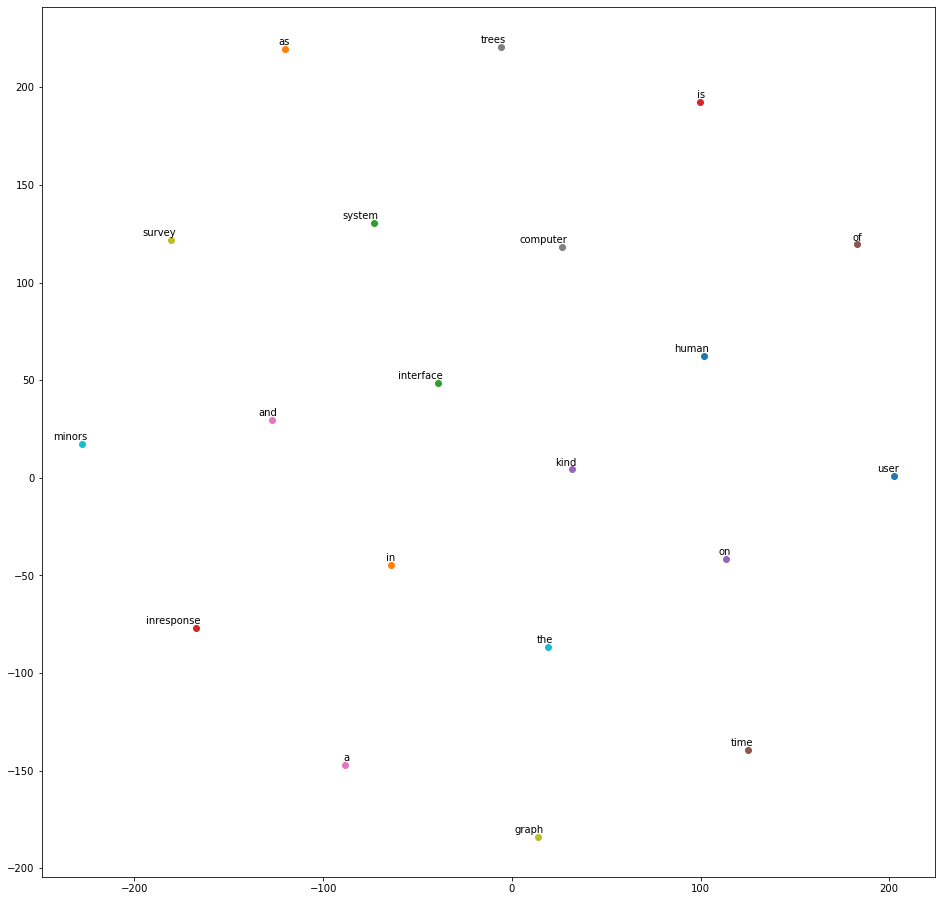

In [15]:
# create TSNE model & plott it in 2-dim vectorspace

from sklearn. manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

def tsne_plot(model):
    # labels (worda) and tokens (values)
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    # das entscheidende hier ist components=2
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    #print the 2-d arrays
    print(new_values)
    #print again the word-list or it for compairsion
    print(words)

    #now create scatterplott and vizualize it
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(model)

# fooling around with analogy- und similarity tasks...
...some more methods: https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html 

In [16]:
# Find the top-N most similar words.
result = model.wv.most_similar(positive=['human', 'computer'], negative=['graph'])
print("{}: {:.4f}".format(*result[0]))

# Which word from the given list doesn’t go with the others?
print(model.wv.doesnt_match("human survey system and minors".split()))

# Compute cosine similarity between two words.
print(model.wv.similarity('human', 'trees'))

# Compute cosine similarity between two sets of words
sim = model.wv.n_similarity(['user', 'interface'], ['trees', 'system'])
print("{:.4f}".format(sim))

#Find the top-N most similar words
result = model.wv.similar_by_word("human")
print("{}: {:.4f}".format(*result[0]))

in: 0.1962
system
-0.02186101
0.0671
user: 0.2410


/home/whoami/anaconda3/lib/python3.8/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
